In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
pathtofile = '../code-00-preprocessdataset/'
Wrd2Sense = pd.read_csv(pathtofile + "ThingsWrd2Sns.txt", sep=",")
ImgInfo = pd.read_csv(pathtofile + "KeptTHINGSInfo.txt", sep=",")

In [11]:
pd.options.display.max_columns = None
ImgInfo.head()

,Word,uniqueID,ExampleImage,Bigram,Percent_known,Rank_combiningCOCA_concreteness_,Concreteness_M_,COCAWordFreq_online_,COCAWordFreq,COCA_dispersion_,COCA_rank_,BNCFreq,SUBTLEXFreq,DominantPartOfSpeech,Bottom_upCategory_HumanRaters_,Top_downCategory_WordNet_,Top_downCategory_manualSelection_,AllBottom_upCategories,WordNetSynonyms,WordNetID,WordnetID2,WordnetID3,WordnetID4,Definition_fromWordNet_Google_OrWikipedia_,NumberOfWordMeaningsInList
0,aardvark,aardvark,https://imgur.com/LAJGlN0,0,1.00,18158.5,4.68,53,28.0,0.78,51507.0,NaN,21.0,Noun,animal,animal,animal,animal,"aardvark, ant_bear, anteater, Orycteropus_afer",n02082791,aardvark%1:05:00::,aardvark#1,aardvark.n.01,nocturnal burrowing mammal of the grasslands o...,1
1,abacus,abacus,https://imgur.com/peZeM0l,0,0.93,17741.0,4.52,188,97.0,0.86,34578.0,NaN,12.0,Noun,NaN,NaN,home decor,mathematical device,abacus,n02666196,abacus%1:06:00::,abacus#2,abacus.n.02,a calculator that performs arithmetic function...,1
2,accordion,accordion,https://imgur.com/GgGvdZR,0,0.97,8541.0,4.86,816,735.0,0.90,15132.0,NaN,67.0,Noun,musical instrument,musical instrument,musical instrument,musical instrument,"accordion, piano_accordion, squeeze_box",n02672831,accordion%1:06:00::,accordion#1,accordion.n.01,a portable box-shaped free-reed instrument; th...,1
3,acorn,acorn,https://imgur.com/YfIB5lM,0,1.00,7723.5,4.96,1289,692.0,0.85,16007.0,238.0,37.0,Noun,NaN,fruit,NaN,nut,acorn,n12267677,acorn%1:20:00::,acorn#1,acorn.n.01,fruit of the oak tree: a smooth thin-walled nu...,1
4,airbag,airbag,https://imgur.com/9DR76Ri,0,0.96,10729.0,4.81,228,439.0,0.79,20359.0,NaN,20.0,Noun,part of car,container,part of car,"car safety device, part of car, safety device",air_bag,n02685365,air_bag%1:06:00::,air_bag#1,air_bag.n.01,a safety restraint in an automobile; the bag i...,1


In [15]:
len(ImgInfo['New_' + dimension].value_counts().index)

22

In [23]:
dimension = 'Top_downCategory_manualSelection_'
# dimension = 'Top_downCategory_WordNet_'
figure = False

freq0 = ImgInfo[dimension].value_counts()
print(freq0)
listindex = freq0.index

if figure:
    plt.figure(figsize = (150,40))
    b = sns.countplot(x=dimension, data=ImgInfo,order = ImgInfo[dimension].value_counts().index)
    b.axes.set_title("THINGS Dataset",fontsize=120)
    b.set_xlabel("Category",fontsize=120)
    b.set_ylabel("Count",fontsize=120)
    b.tick_params(labelsize=100, labelrotation = 45)
    plt.show()

food                                    127
animal                                  106
clothing                                 69
container                                62
vehicle                                  54
                                       ... 
electronic device, medical equipment      1
container, tool                           1
container, clothing accessory             1
electronic device, sports equipment       1
toy, vehicle, sports equipment            1
Name: Top_downCategory_manualSelection_, Length: 65, dtype: int64


In [59]:
##Just show the top categories, not theintersections. 
##Organize/downsample
#Only pick rows without commas

Topcategories = []
FoodSubcategories = []
AnimalSubcategories = []

[Topcategories.append(i) for i in listindex if ',' not in i]
[FoodSubcategories.append(i) for i in listindex if ',' in i and 'food' in i]
[AnimalSubcategories.append(i) for i in listindex if ',' in i and 'animal' in i]

missingcat = ['vegetable','fruit','bird','insect']

[Topcategories.append(p) for p in missingcat]

print(Topcategories)
# print(AnimalSubcategories)

['food', 'animal', 'clothing', 'container', 'vehicle', 'tool', 'body part', 'musical instrument', 'sports equipment', 'electronic device', 'home decor', 'plant', 'furniture', 'weapon', 'part of car', 'office supply', 'drink', 'toy', 'medical equipment', 'clothing accessory', 'kitchen tool', 'kitchen appliance', 'vegetable', 'fruit', 'bird', 'insect']


food                  155
animal                126
clothing               69
container              62
vehicle                54
tool                   50
electronic device      35
sports equipment       34
vegetable              34
fruit                  33
body part              32
musical instrument     32
home decor             32
weapon                 31
clothing accessory     30
plant                  30
furniture              27
bird                   27
toy                    22
part of car            21
kitchen tool           20
medical equipment      20
office supply          19
drink                  17
insect                 15
kitchen appliance      12
Name: New_Top_downCategory_manualSelection_, dtype: int64
26
food                  14.918191
animal                12.127045
clothing               6.641001
container              5.967276
vehicle                5.197305
tool                   4.812320
electronic device      3.368624
sports equipment       3.272377
vegetab

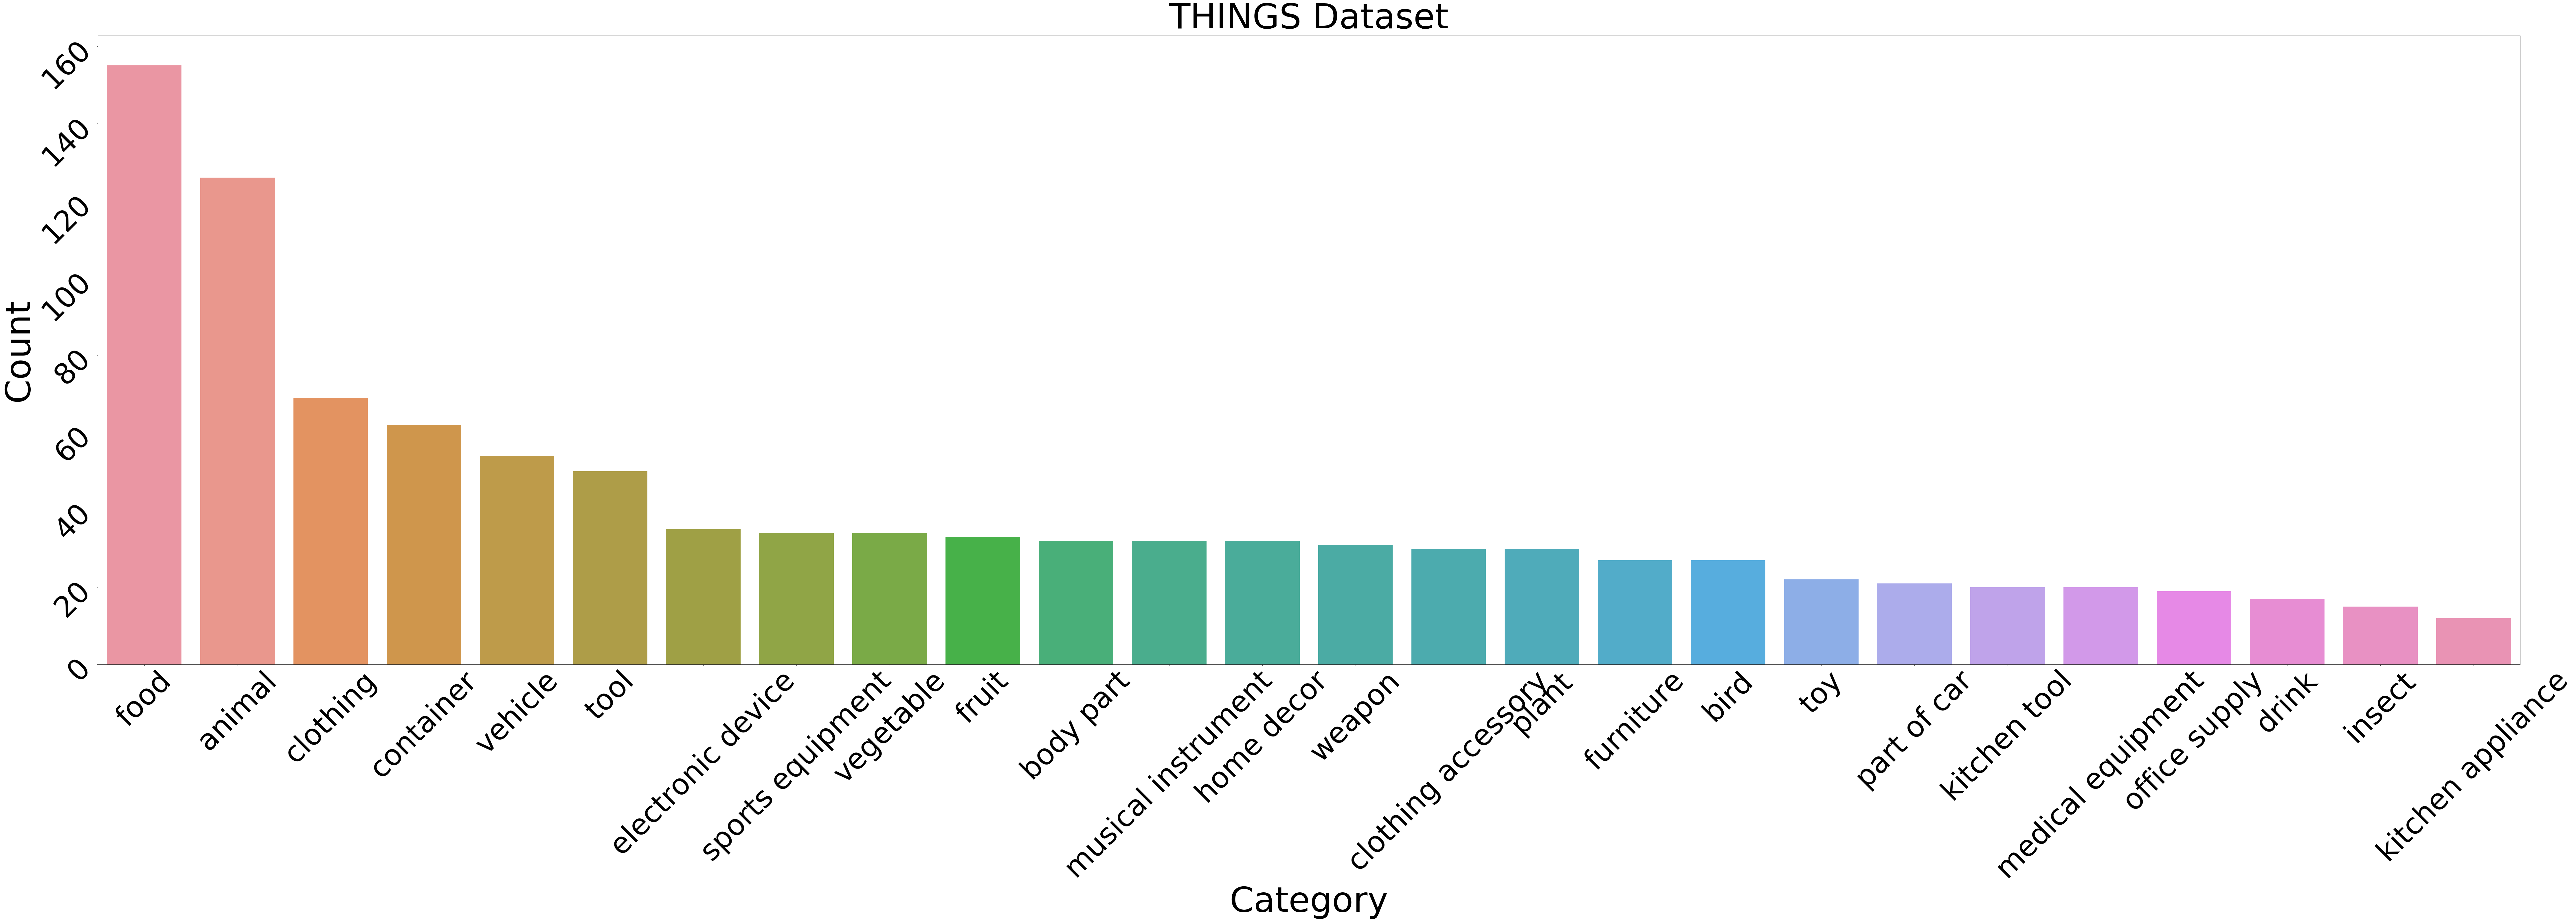

In [61]:
Figure = True

ImgInfo['New_' + dimension] = np.nan

#if name is in main dimension column assign it to new column
for i in Topcategories:
    ImgInfo.loc[ImgInfo[dimension].str.contains(i ,na=False),['New_' + dimension]]= i 

    
freq = ImgInfo['New_' + dimension].value_counts()
print(freq)
print(len(freq))
percentfreq = freq/sum(freq)*100
print(percentfreq)

if Figure:
    plt.figure(figsize = (150,40))
    c = sns.countplot(x='New_' + dimension, data=ImgInfo,order = ImgInfo['New_' + dimension].value_counts().index)
    c.axes.set_title("THINGS Dataset",fontsize=120)
    c.set_xlabel("Category",fontsize=120)
    c.set_ylabel("Count",fontsize=120)
    c.tick_params(labelsize=100, labelrotation = 45)
    plt.show()

In [53]:
list(ImgInfo[ImgInfo['Top_downCategory_WordNet_'].str.match('container', na=False)].Word)

['airbag',
 'ambulance',
 'aquarium',
 'ashtray',
 'backpack',
 'bag',
 'bank',
 'basket',
 'bathtub',
 'beaker',
 'beanbag',
 'bedpan',
 'bike',
 'bin',
 'birdbath',
 'bottle',
 'bowl',
 'box',
 'briefcase',
 'bucket',
 'bulldozer',
 'camper',
 'can',
 'canister',
 'car',
 'carriage',
 'cart',
 'cassette',
 'chalice',
 'chariot',
 'coffin',
 'crate',
 'cup',
 'dish',
 'drawer',
 'dumpster',
 'dustpan',
 'envelope',
 'fishbowl',
 'flask',
 'footbath',
 'forklift',
 'garbage',
 'glass',
 'go-kart',
 'goblet',
 'hearse',
 'inhaler',
 'inkwell',
 'jar',
 'jeep',
 'jug',
 'keg',
 'kettle',
 'ladle',
 'limousine',
 'locket',
 'luggage',
 'mailbox',
 'matchbox',
 'minivan',
 'motorcycle',
 'mug',
 'pillbox',
 'pitcher',
 'pocket',
 'pot',
 'purse',
 'rickshaw',
 'sandbag',
 'sarcophagus',
 'scoop',
 'scooter',
 'shaker',
 'skateboard',
 'snowmobile',
 'snowplow',
 'spoon',
 'stroller',
 'suitcase',
 'taxi',
 'teabag',
 'teacup',
 'teapot',
 'thermos',
 'thimble',
 'toolbox',
 'tractor',
 'tr

In [ ]:
freq = ImgInfo.New_Category.value_counts()
percentfreq = freq/sum(freq)*100
percentfreq